<a href="https://colab.research.google.com/github/TasnimPlabon/TasnimPlabon-cse499A_project_sec7/blob/joytu's-branch/cse499a_feature_vector_extraction_and_similarity_between_frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [337]:
from email import generator
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pathlib

import tensorflow as tf
from keras.layers import (Dense, Dropout, Flatten,GlobalAveragePooling2D)
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Sequential,Model
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#from keras.optimizers import Adam
import cv2
from IPython.display import HTML, display
from glob import glob
from PIL import Image
import time


**Loading dataset from directory**

In [338]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [339]:
dataset_dir="/content/drive/MyDrive/Colab Notebooks/mrbean"
data_dir= tf.keras.utils.image_dataset_from_directory(dataset_dir,None,None)
#Function to define image size to be loaded into model
def get_img_size():
  img_size=(720,1280,3)
  return img_size

Found 14 files belonging to 1 classes.


# **Loading Resnet50 Model from Keras**

In [340]:
#Function for loading resnet50 model from keras
def load_model():
  resnet_model=Sequential()
  model=ResNet50(include_top=False,
  input_shape=get_img_size(),
  weights='imagenet',
  pooling='avg',
  classes=None)
  return model

In [ ]:
#Loading model
model= load_model()
model.summary()

In [343]:
def get_layers_list(model):
  layers_list = []
  for i in range(len(model.layers)):
      layer = model.layers[i]        
      layers_list.append(layer.name)   
  return layers_list

In [344]:
layers_list = get_layers_list(model)
print("Architecture of the {} model:\n{}".format(model.name, layers_list))

Architecture of the resnet50 model:
['input_8', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_c

In [393]:
def get_layername_feature_extraction(model):
  layername_feature_extraction= 'predictions'
  return layername_feature_extraction

In [394]:
img_size_model=get_img_size()
def image_processing(img_array):
  img= np.expand_dims(img_array,axis=0)
  processed_img=preprocess_input(img)
  return processed_img
#Function for predicting classtypes
def prediction(model,img_path,display_img=True):
  img_type=os.path.basename(img_path).split(".")[0]
  img = image.load_img(img_path, target_size=img_size_model)
  img_arr = np.array(img)
  img_ = image_processing(img_arr)

  predictions = model.predict(img_)
  predicted_class = predictions
        
  return predicted_class

In [352]:
#setting indexes
idx1=0
idx2=1
idx3=2
idx4=3
idx5=4
idx6=5
idx7=6
idx8=7
idx9=8

In [395]:
#FFunction for formulating image path of each image from directory
def img_pathfinder(index):
  img_dir='/content/drive/MyDrive/Colab Notebooks/mrbean'
  img_path_list=['frame0-00-00.00.jpg','frame0-00-01.00.jpg','frame0-00-02.00.jpg', 'frame0-00-03.00.jpg','frame0-00-04.00.jpg','frame0-00-10.00.jpg','frame0-00-30.00.jpg','frame0-00-50.00.jpg','frame0-01-00.00.jpg']
  img_path=os.path.join(img_dir,img_path_list[index])
  return img_path

In [396]:
#Function to convert images into numpy array
def preprocess_img(index):
  img_size_model = get_img_size()
  img_path=img_pathfinder(index)
  img = image.load_img(img_path, target_size=img_size_model)
  img_path_list=['frame0-00-00.00.jpg','frame0-00-01.00.jpg','frame0-00-02.00.jpg', 'frame0-00-03.00.jpg','frame0-00-04.00.jpg','frame0-00-10.00.jpg','frame0-00-30.00.jpg','frame0-00-50.00.jpg','frame0-01-00.00.jpg']
  x_ = np.array(img)
  
  # Displaying the image
  plt.axis('off')
  plt.title(img_path_list[index])
  plt.imshow(x_/255.)

  # Expanding the shape
  x = np.expand_dims(x_, axis=0)
  # Converting image from RGB to BGR 
  x = preprocess_input(x)
  print('Input image shape :', x.shape)
  

**Pre-processing each image frame**

Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)


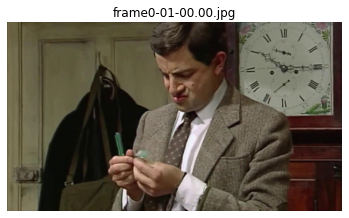

In [397]:
img1=preprocess_img(idx1)
img2=preprocess_img(idx2)
img3=preprocess_img(idx3)
img4=preprocess_img(idx4)
img5=preprocess_img(idx5)
img6=preprocess_img(idx6)
img7=preprocess_img(idx7)
img8=preprocess_img(idx8)
img9=preprocess_img(idx9)


Input image shape : (1, 720, 1280, 3)


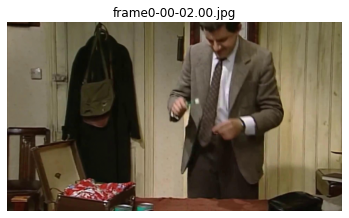

In [308]:
img3=preprocess_img(idx3)

Input image shape : (1, 720, 1280, 3)


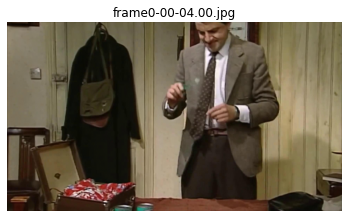

In [268]:
img4=preprocess_img(idx4)

**Setting paths of each frame**

In [360]:
img_path1=img_pathfinder(idx1)
img_path2=img_pathfinder(idx2)
img_path3=img_pathfinder(idx3)
img_path4=img_pathfinder(idx4)
img_path5=img_pathfinder(idx5)
img_path6=img_pathfinder(idx6)
img_path7=img_pathfinder(idx7)
img_path8=img_pathfinder(idx8)
img_path9=img_pathfinder(idx9)

**Running each frame through model**

In [362]:
predicted_class1 = prediction(model, img_path1, display_img=True)
predicted_class2 = prediction(model, img_path2, display_img=True)
predicted_class3 = prediction(model, img_path3, display_img=True)
predicted_class4 = prediction(model, img_path4, display_img=True)
predicted_class5 = prediction(model, img_path5, display_img=True)
predicted_class6 = prediction(model, img_path6, display_img=True)
predicted_class7 = prediction(model, img_path7, display_img=True)
predicted_class8 = prediction(model, img_path8, display_img=True)
predicted_class9 = prediction(model, img_path9, display_img=True)

In [363]:
#Function to add extra layers of networks from resnet50 to the frames
def layers() :
 img_type=os.path.basename(img_path).split(".")[0]
 img = image.load_img(img_path, target_size=img_size_model)
 img_arr = np.array(img)
 img_ = image_processing(img_arr)
  
 x=img_
 p=img_
 y=GlobalAveragePooling2D()(x)
 p=Dense(128,activation='relu')
 a=Dense(5,activation='softmax')(x)
 model1=Model(inputs=model.input,outputs=model.output)

 return model1

# **Feature Extraction**

In [364]:
#Function for feature extraction
def extract_feature_vectors(model,img_path):
  #creating new model instance without last layer
  model=layers()
  layername_feature_extraction=get_layername_feature_extraction(model)
  model_feature_vector=Model(inputs=model.input,outputs=model.layers[-1].output)
  img_size_model=get_img_size()
  img=image.load_img(img_path,grayscale=False,target_size=img_size_model)
  img_arr= np.array(img)
  img_=image_processing(img_arr)

  feature_vector=model_feature_vector.predict(img_)
  return feature_vector

In [365]:
#Extracting features from images
feature_vector1=extract_feature_vectors(model,img_path1)
feature_vector2=extract_feature_vectors(model,img_path2)
feature_vector3=extract_feature_vectors(model,img_path3)
feature_vector4=extract_feature_vectors(model,img_path4)
feature_vector5=extract_feature_vectors(model,img_path5)
feature_vector6=extract_feature_vectors(model,img_path6)
feature_vector7=extract_feature_vectors(model,img_path7)
feature_vector8=extract_feature_vectors(model,img_path8)
feature_vector9=extract_feature_vectors(model,img_path9)


print (feature_vector1)
print (feature_vector2)
print (feature_vector3)
print (feature_vector4)
print (feature_vector5)
print (feature_vector6)
print (feature_vector7)
print (feature_vector8)
print (feature_vector9)

[[0.09708145 0.56132364 0.05690656 ... 1.2726734  0.6874903  0.40369865]]
[[0.11029619 0.66394395 0.05210518 ... 1.2567075  0.69607294 0.30809337]]
[[0.0992953  0.5583645  0.04924949 ... 1.2463998  0.6874549  0.38294283]]
[[0.11241992 0.5163534  0.05455622 ... 1.2519228  0.6999976  0.42723015]]
[[0.12517175 0.6159827  0.09002687 ... 1.1909442  0.7309787  0.3995165 ]]
[[0.1130584  0.5067143  0.08153606 ... 1.0930512  0.6798969  0.39262015]]
[[0.10614657 0.41119727 0.1970928  ... 0.9043033  0.40265855 0.18432721]]
[[0.08744042 0.49512142 0.19073309 ... 0.83564305 0.34909412 0.1760361 ]]
[[0.13211782 0.52955836 0.16960642 ... 0.9155716  0.488344   0.2555874 ]]


**Feature Vector Extraction from images**

In [278]:
def print_vectorProp(feature_vector): 
  print_all = False # print the whole vector [vgg16 -> 1x4096, resnet50 -> 1x2048]
  print('Feature vector shape:', feature_vector.shape)

  if print_all:
    np.set_printoptions(threshold=np.inf, suppress=True)
    print('Feature vector (all): {}'.format(feature_vector[0]))
    np.set_printoptions(threshold=0)
  else:
    print('Feature vector (truncated): {}'.format(feature_vector[0]))
  

In [367]:
print_vectorProp(feature_vector1)
print_vectorProp(feature_vector2)
print_vectorProp(feature_vector3)
print_vectorProp(feature_vector4)
print_vectorProp(feature_vector5)
print_vectorProp(feature_vector6)
print_vectorProp(feature_vector7)
print_vectorProp(feature_vector8)
print_vectorProp(feature_vector9)

Feature vector shape: (1, 2048)
Feature vector (truncated): [0.09708145 0.56132364 0.05690656 ... 1.2726734  0.6874903  0.40369865]
Feature vector shape: (1, 2048)
Feature vector (truncated): [0.11029619 0.66394395 0.05210518 ... 1.2567075  0.69607294 0.30809337]
Feature vector shape: (1, 2048)
Feature vector (truncated): [0.0992953  0.5583645  0.04924949 ... 1.2463998  0.6874549  0.38294283]
Feature vector shape: (1, 2048)
Feature vector (truncated): [0.11241992 0.5163534  0.05455622 ... 1.2519228  0.6999976  0.42723015]
Feature vector shape: (1, 2048)
Feature vector (truncated): [0.12517175 0.6159827  0.09002687 ... 1.1909442  0.7309787  0.3995165 ]
Feature vector shape: (1, 2048)
Feature vector (truncated): [0.1130584  0.5067143  0.08153606 ... 1.0930512  0.6798969  0.39262015]
Feature vector shape: (1, 2048)
Feature vector (truncated): [0.10614657 0.41119727 0.1970928  ... 0.9043033  0.40265855 0.18432721]
Feature vector shape: (1, 2048)
Feature vector (truncated): [0.08744042 0.49

In [315]:
#Function for generating feature maps of each frame for specified layer
def get_feature_maps(model, layer_idxs, img_path):
  img_size_model = get_img_size()
  img = image.load_img(img_path, target_size=img_size_model)
  img_arr = np.array(img)
  img_ = image_processing(img_arr)
  output_model = [model.layers[i].output for i in layer_idxs]
    
  #Creating a new keras model instance with specific layers
  model_feature_maps = Model(inputs=model.input, outputs=output_model)
  feature_maps = model_feature_maps.predict(img_)
    
  return feature_maps

In [316]:
#Function for displaying feature maps
def show_feature_maps(model, feature_maps, idx):
  square = 8
  block = 0
  layers_list = get_layers_list(model)
  feature_maps_ = []
  if len(feature_maps) == 1:
    feature_maps_.append(feature_maps)
  else:
    feature_maps_ = feature_maps
  for fmap in feature_maps_:
    ix=1
    blockname= layers_list[idx[block]].split("_")[0]
    fig=plt.figure()
    fig.suptitle("Feature maps extracted from {} in the Resnet50 model".format(blockname), fontsize=13)

  for _ in range(square):
            for _ in range(square):
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(fmap[0, :, :, ix-1], cmap = 'gray')
                ix += 1
  plt.show()
  block += 1

  if fmap is not feature_maps_[-1]:
    print("-"*100)

*Viewing the feature maps collected from certain frames*

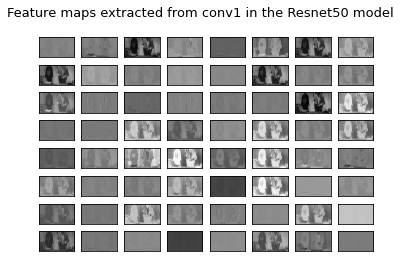

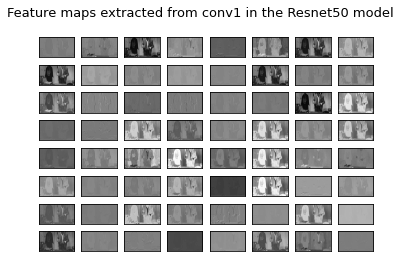

In [368]:
idx = [2]
feature_maps = get_feature_maps(model, idx, img_path1)
show_feature_maps(model,feature_maps,idx)
feature_maps2 = get_feature_maps(model, idx, img_path2)
show_feature_maps(model,feature_maps2,idx)
feature_maps3 = get_feature_maps(model, idx, img_path5)

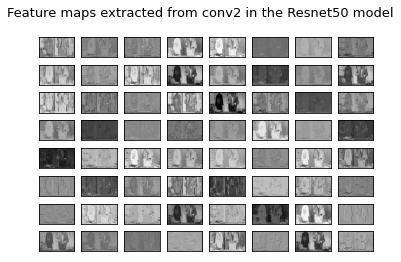

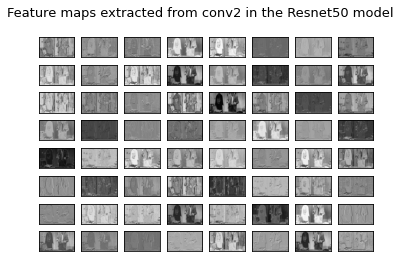

In [249]:
idx = [10]
feature_maps = get_feature_maps(model, idx, img_path)
show_feature_maps(model,feature_maps,idx)
feature_maps2 = get_feature_maps(model, idx, img_path2)
show_feature_maps(model,feature_maps2,idx)

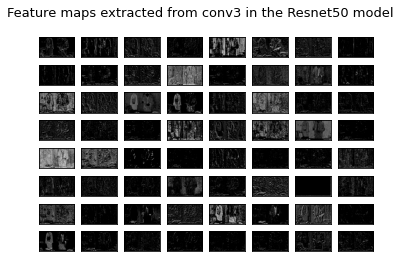

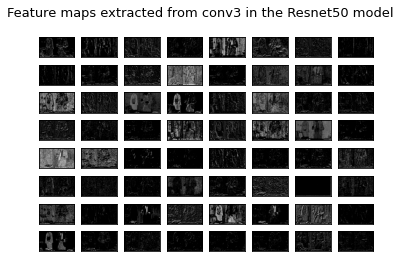

In [369]:
idx = [50]
feature_maps = get_feature_maps(model, idx, img_path)
show_feature_maps(model,feature_maps,idx)
feature_maps2 = get_feature_maps(model, idx, img_path5)
show_feature_maps(model,feature_maps2,idx)

# **Calculating similarity between frames using Eucledian distance**
Calculating euclidean distance between 2 feature vectors


In [370]:
# calculating euclidean distance between vectors
from scipy.spatial.distance import euclidean
# calculate distance
dist1 = euclidean(feature_vector1, feature_vector2)
dist2= euclidean(feature_vector1, feature_vector3)
dist3= euclidean(feature_vector1, feature_vector4)
dist4= euclidean(feature_vector1, feature_vector5)
dist5= euclidean(feature_vector1, feature_vector6)
dist6= euclidean(feature_vector1, feature_vector7)
dist7= euclidean(feature_vector1, feature_vector8)
dist8= euclidean(feature_vector1, feature_vector9)


print(dist,dist2,dist3,dist4,dist5,dist6,dist7,dist8)

2.0821640491485596 2.6663901805877686 3.2277534008026123 3.999682664871216 4.43966007232666 10.781335830688477 11.049793243408203 10.881255149841309


Formulating dataframes for visualization

In [389]:

arr={'time_diff':[1,2,3,4],'distance':[dist1,dist2,dist3,dist4]}
df=pd.DataFrame(arr,columns=['distance','time diff'])
arr2={'time_diff':[10,50,100],'distance':[dist5,dist6,dist7,dist8]}
df2=pd.DataFrame(arr2,columns=['distance','time diff'])
arr3={'time_diff':[1,2,3,4,10,50,100],'distance':[dist1,dist2,dist3,dist4,dist5,dist6,dist7,dist8]}
df3=pd.DataFrame(arr3,columns=['distance','time diff'])


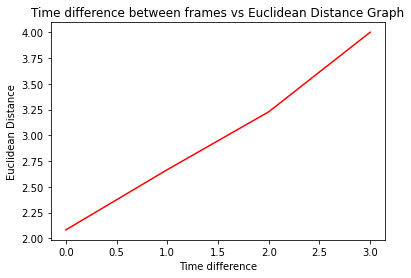

In [390]:
plt.plot(df,color='red')
plt.xlabel("Time difference")
plt.ylabel("Euclidean Distance")
plt.title("Time difference between frames vs Euclidean Distance Graph")
plt.show()

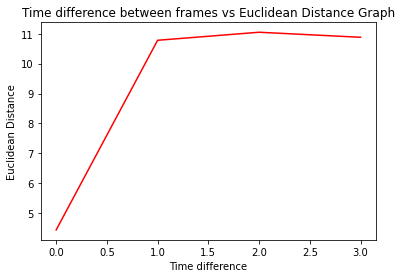

In [387]:
plt.plot(df2,color='red')
plt.xlabel("Time difference")
plt.ylabel("Euclidean Distance")
plt.title("Time difference between frames vs Euclidean Distance Graph")
plt.show()

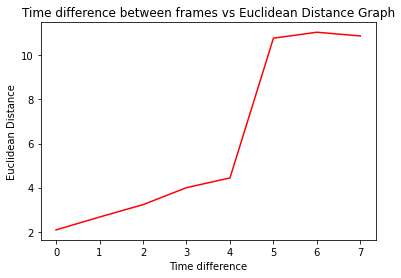

In [391]:
plt.plot(df3,color='red')
plt.xlabel("Time difference")
plt.ylabel("Euclidean Distance")
plt.title("Time difference between frames vs Euclidean Distance Graph")
plt.show()